In [1]:
# Installing dependencies
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision
from torch.utils.data import DataLoader, Dataset
import csv
import cv2
import math
import matplotlib.pyplot as plt
import re
from collections import Counter
import os
import medmnist
from medmnist import INFO, Evaluator

In [2]:
data_flag = 'bloodmnist'
download = True

In [3]:
num_epochs = 5
batch_size = 8
lr = 0.01

In [4]:
info = INFO[data_flag]
task = info['task']
num_classes = len(info['label'])
print(info)
DataClass = getattr(medmnist, info['python_class'])

{'python_class': 'BloodMNIST', 'description': 'The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.', 'url': 'https://zenodo.org/records/10519652/files/bloodmnist.npz?download=1', 'MD5': '7053d0359d879ad8a5505303e11de1dc', 'url_64': 'https://zenodo.org/records/10519652/files/bloodmnist_64.npz?download=1', 'MD5_64': '2b94928a2ae4916078ca51e05b6b800b', 'url_128': 'https://zenodo.org/records/10519652/files/bloodmnist_128.npz?download=1', 'MD5_128': 'adace1e0ed228fccda1f39692059dd4c', 'url_224': 'https://zenodo.org/records/10519652/files/bloodmnist_224.npz

In [5]:
device = torch.device('mps' if torch.mps.is_available else 'cpu')
print(device)

mps


In [6]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
    # already center cropped and resized
])

In [7]:
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 35.5M/35.5M [00:03<00:00, 9.52MB/s]


In [8]:
print(train_dataset)
print('='*50)
print(test_dataset)

Dataset BloodMNIST of size 28 (bloodmnist)
    Number of datapoints: 11959
    Root location: /Users/mikayla/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    Lice

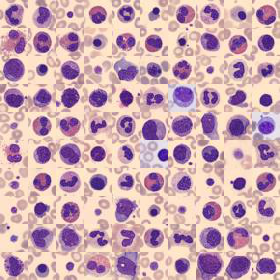

In [9]:
train_dataset.montage(length=10)

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__() # basic class stuff; nothing to do with NN
        self.conv1 = nn.Conv2d(3, 16, 3, 1)
        